**II. Formulation of the Problem of Generating Combinatorial Objects**

In most of the generation problems, we have:

Each object (can be?) is represented by an array X[1:N]

The elements of the array are taken from a domain S={a1,a2,...,am}. Often, S is a finite set of successive integers.

The values of array X must satisfy some constraints C so that X represents a legitimate object of the type in question.

We will show the specifics in each of the following instances of combinatorial object generation

**Problem 7: Generation of all k-cliques in a given graph G=(V,E) of n nodes, where k is an integer, 1 <= k <= n**
* A k-clique in a graph G is a subset of k nodes where every pair of those nodes are adjacent in G.
* A k-clique is representable by an array X[1:k], where X[i] is the label of the i-th node in the k-clique.
* Each X[i] takes its elements from {1,2,...,n}, which are the labels of the nodes.

Constraints:
* X[i] != X[j] for all i != j
* (X[i],X[j]) is an edge for every i and j

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline 

def loadADJ(N):
    #load the AJD matrix from a txt file into an array an return it
    #we are using random num generation for now to make it work simple
    ADJ = np.random.choice([0,1],(N,N))
    print "Generating a random " + str(N) + " * " + str(N)+" directed adjacency Graph.\n The Input Matrix: "
    print ADJ
    G=nx.MultiDiGraph(ADJ)
    nx.draw(G,nodecolor='r',edge_color='b',with_labels=True)
    plt.show()
    return ADJ
    
    

In [2]:
def isEdge(node1,node2):
    #checks the ADJ matric to verify if (node1,node2) is an edge. for a directed graph, we check both directions 
    #print a,b,ADJ[_from][_to]
    if ADJ[node1][node2]==1 and ADJ[node2][node1]==1:
        return True
    else:
        return False

In [3]:
def Bound(X,r):
    #print "current state of X and r is " + str(X) + " -- r:" + str(r)
    for i in range(0,r):                #elements 0 to r-1 have been set. we are checking for element r
        if X[i]==X[r]:
            return False
        if isEdge(X[i],X[r])==False:
            return False
    
    return True
        

In [4]:
def getNext(X,r,N):
    X[r]=X[r]+1
    while X[r] <=N-1:  #while X[r] is in domian; here the domain is [0..N-1]: all the nodes in the graph
        if Bound(X,r)==True :
            return
        else:
            X[r]=X[r] +1 
    
    X[r]=a0 

Enter the total number of nodes in the Graph: 7
Enter K, the size of K cliques: 3
Generating a random 7 * 7 directed adjacency Graph.
 The Input Matrix: 
[[1 0 1 0 1 1 1]
 [0 0 0 0 1 1 1]
 [1 0 0 1 1 1 1]
 [0 1 1 1 1 1 1]
 [1 1 1 1 1 0 0]
 [1 0 1 0 0 0 1]
 [1 1 0 0 1 0 1]]


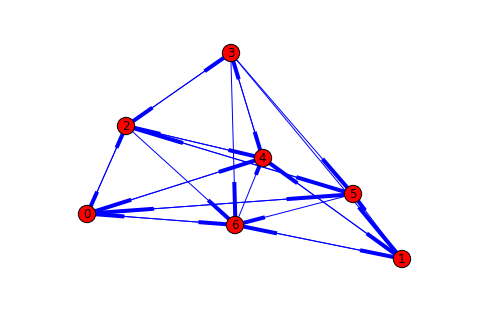

The initial state of X is : [-1, -1, -1]
found a solution: [0, 2, 4]
found a solution: [0, 2, 5]
found a solution: [0, 4, 2]
found a solution: [0, 5, 2]
found a solution: [2, 0, 4]
found a solution: [2, 0, 5]
found a solution: [2, 3, 4]
found a solution: [2, 4, 0]
found a solution: [2, 4, 3]
found a solution: [2, 5, 0]
found a solution: [3, 2, 4]
found a solution: [3, 4, 2]
found a solution: [4, 0, 2]
found a solution: [4, 2, 0]
found a solution: [4, 2, 3]
found a solution: [4, 3, 2]
found a solution: [5, 0, 2]
found a solution: [5, 2, 0]


In [7]:
### Backtracking
import numpy as np

r=0     #r is the tree level, or index of X. 
X=[]     #X represent one instance of a Hamiltonian cycle in the graph 
a0=-1    # this is an initial value for elements of X. pick something that tells
         #       this element has not been assigned yet
N = int(raw_input("Enter the total number of nodes in the Graph: "))  # Size of the array. change based on your problem 
K = int(raw_input("Enter K, the size of K cliques: "))
ADJ = loadADJ(N)        # this function creates an ADJ matric from a txt file


for i in range(0,K):
    X.append(a0)
    
print "The initial state of X is : " + str(X)
found = False
    
while r>-1:
    getNext(X,r,N)
    if (X[r]==a0):
        r=r-1
    elif r==K-1:
        print "found a solution: " + str(X)
        found = True
    else:
        r=r+1

if not found:
    print "This graph has no k-cliques."